In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules 

In [15]:
df = pd.read_csv(r"C:\Users\oyedeepak\Downloads\Assignment\Association Rules\book.csv")

In [16]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [17]:
len(df)

2000

In [18]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
print (frequent_itemsets.head())

   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


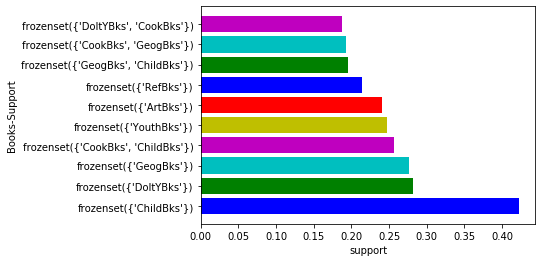

In [19]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False, inplace=True)
plt.barh(list(range(1,11)),frequent_itemsets.support[1:11],color='bgcmyr')
plt.yticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.ylabel('Books-Support')
plt.xlabel('support')
plt.show()

In [20]:
#association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,GeogBks,ChildBks,0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
1,RefBks,CookBks,0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
2,RefBks,ChildBks,0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
3,CookBks,ChildBks,0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081
4,GeogBks,CookBks,0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571


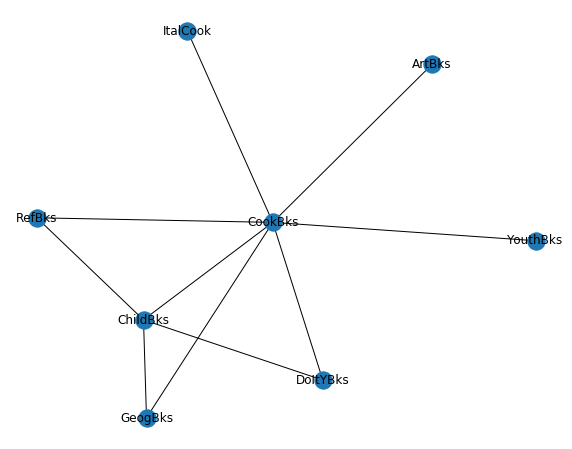

In [21]:
import networkx as nx


fig, ax=plt.subplots(figsize=(10,8))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [22]:
# Conclusion:
#Cook books and child books are the most sold items.